In [256]:
import os

In [257]:
os.getcwd()

'C:\\Users\\Admin\\Downloads\\archive (5)'

In [258]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [259]:
path = 'C:\\Users\\Admin\\Downloads\\archive (5)\\'

In [260]:
df = pd.read_csv(path+"Sleep_health_and_lifestyle_dataset.csv")
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [261]:
# Check for Null values

df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [262]:
# Check for unique values

df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [263]:
df.shape

(374, 13)

In [265]:
# Occupational Analysis: 

# Pie Chart to analyse sleep duration across different occupations.

In [266]:
# Labels for the sections of pie chart
labels = ["Software Engineer", "Doctors", "Nurse", "Sceientist", "Lawyer", "Sales Represntative", "Sales Person", "Teacher", "Accountant","Engineer", "Manager"]

# The values of each section of the pie chart
sizes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# The colors of each section of the pie chart
colors = ["red", "white", "lightcoral", "lightskyblue", "yellow", "green", "blue", "purple","orange", "pink", "brown"]


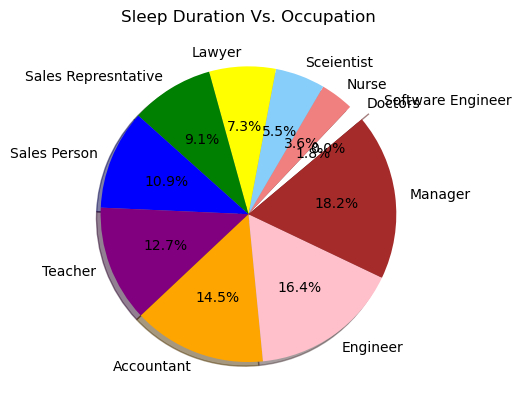

In [267]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.title('Sleep Duration Vs. Occupation')

# Show the pie chart
plt.show()

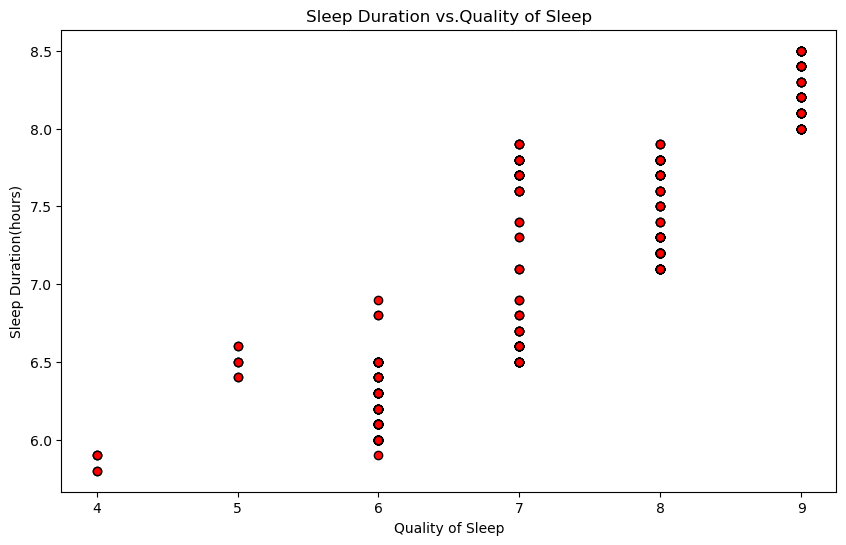

In [268]:
# Visualize the relationship between sleep duration and sleep quality

# Set up the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x='Quality of Sleep', y='Sleep Duration', marker="o", facecolors="red", edgecolors="black", alpha=0.95, data=df)
plt.title('Sleep Duration vs.Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration(hours)')

# Show the plot
plt.show()

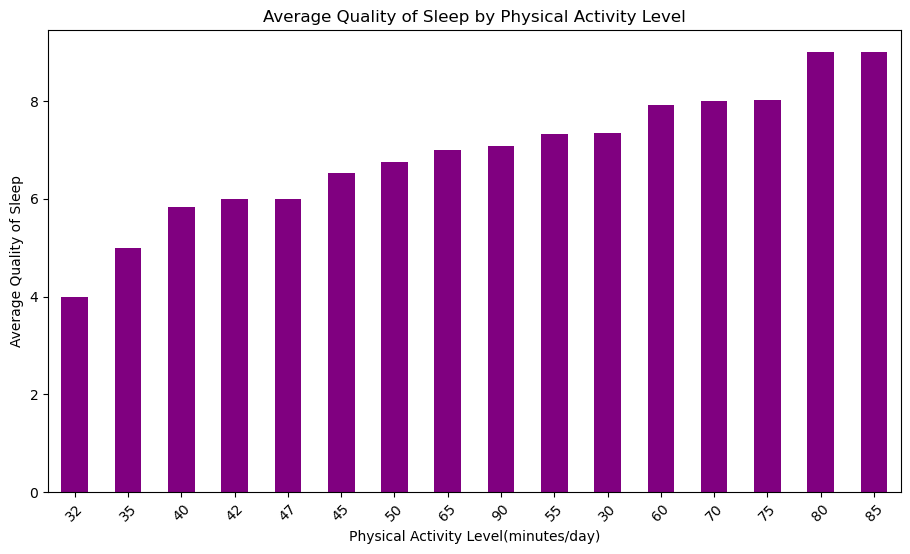

In [248]:
# Analysis for the Average physical activity level with sleep quality

avg_sleep_quality = df.groupby('Physical Activity Level')['Quality of Sleep'].mean().sort_values()

# Set up the bar plot
plt.figure(figsize=(11, 6))
avg_sleep_quality.plot(kind='bar', color='purple')
plt.title('Average Quality of Sleep by Physical Activity Level')
plt.xlabel('Physical Activity Level(minutes/day)')
plt.ylabel('Average Quality of Sleep')
plt.xticks(rotation=45)  

# Show the plot
plt.show()

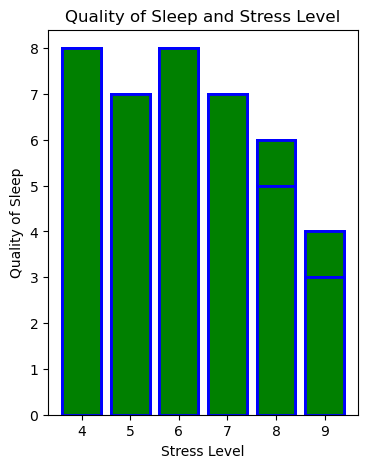

In [249]:
# Visualization for the quality of sleep based on stress levels

df = pd.read_csv(path+"Sleep_health_and_lifestyle_dataset.csv")

# plotting the data for Bar plots
plt.figure(figsize=(4, 5))
plt.bar(df['Quality of Sleep'], df['Stress Level'], color='green', edgecolor='blue', 
        linewidth=2)
plt.title('Quality of Sleep and Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

# Show the plot
plt.show()

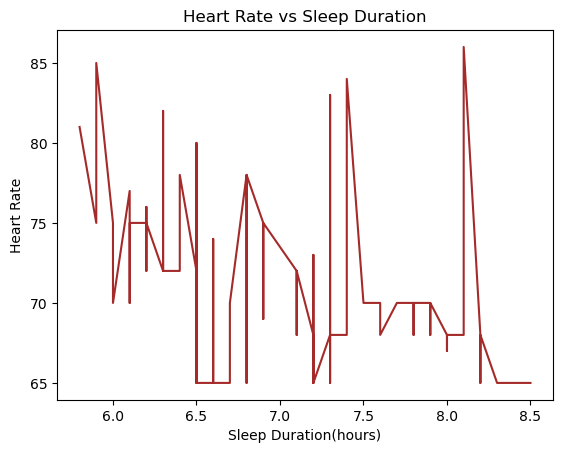

In [250]:
# line chart for heart rate and sleep Duartion

# Sorting values by 'Sleep Duration' for better visualization
df = df.sort_values(by='Sleep Duration')

# Set up the line plot
plt.plot(df['Sleep Duration'], df['Heart Rate'], color="brown")
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Sleep Duration(hours)')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

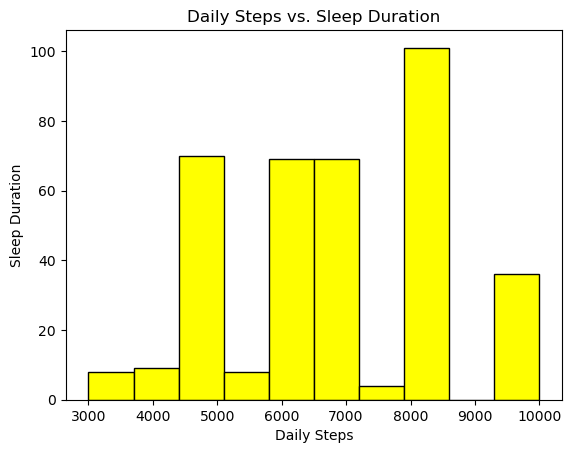

In [251]:
# Sleep quality analysis between daily Steps vs sleep duration

# Set up the Histogram
x = df["Daily Steps"]
plt.hist(x, color="Yellow", edgecolor="black")
plt.title('Daily Steps vs. Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration')

# Show the plot
plt.show()

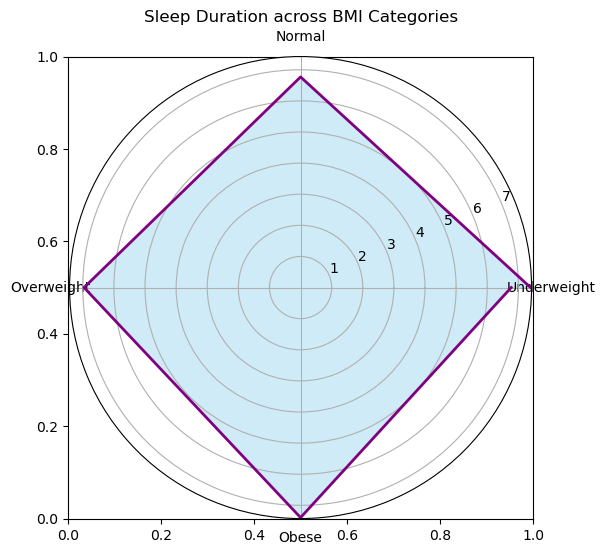

In [252]:
# Radar Chart for BMI vs Sleep Duration

# Mapping BMI categories to numeric values
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}

# Convert 'BMI Category' to numeric values
df['BMI Category Numeric'] = df['BMI Category'].map(bmi_mapping)

# Calculate mean sleep duration for each BMI category
grouped = df.groupby('BMI Category Numeric')['Sleep Duration'].mean().reset_index()

# Categories and corresponding sleep duration
categories = grouped['BMI Category Numeric']
sleep_duration = grouped['Sleep Duration']

# Labels for the radar chart
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Number of categories
num_categories = len(labels)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set the angle for the radar chart
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]

# Fill the radar chart with sleep duration values
sleep_duration = list(sleep_duration)  

# Convert to list for indexing

# Handling dimension mismatch by repeating values for each category
sleep_duration += sleep_duration[:2]

# Plotting the radar chart
ax = plt.subplot(111, polar=True)
ax.fill(angles, sleep_duration, color='skyblue', alpha=0.4)
ax.plot(angles, sleep_duration, color='purple', linewidth=2, linestyle='solid')

# Add labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Show the plot
plt.title('Sleep Duration across BMI Categories')
plt.show()

In [253]:
BMI_Category_count=df['BMI Category'].value_counts().reset_index()
BMI_Category_count

,BMI Category,count
0,Normal,195
1,Overweight,148
2,Normal Weight,21
3,Obese,10


C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

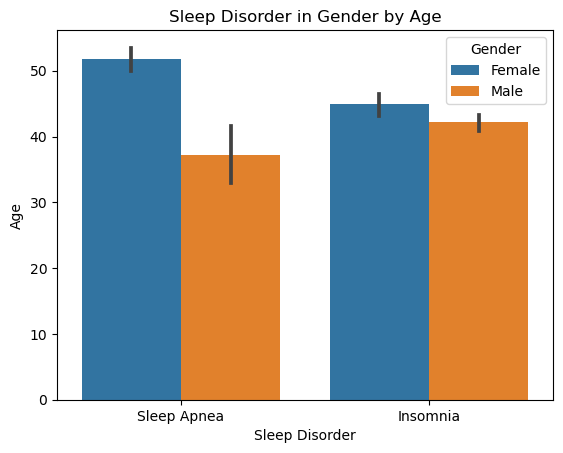

In [254]:
#Visualization of Sleep Disorder by Age and Gender

sns.barplot(x="Sleep Disorder", y="Age", hue="Gender", data=df)

# Set up the Bar plot
plt.title('Sleep Disorder in Gender by Age')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')

# Show the plot
plt.show()


In [255]:
Sleep_Disorder_count = df['Sleep Disorder'].value_counts().reset_index()
Sleep_Disorder_count

,Sleep Disorder,count
0,Sleep Apnea,78
1,Insomnia,77
